In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [6]:
df = pd.read_csv('bird_tracking.csv', index_col=0)
df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [7]:
eric = df.bird_name == "Eric"


In [8]:
x,y = df.longitude[eric], df.latitude[eric]

In [9]:
plt.figure(figsize=(7,7));

<Figure size 504x504 with 0 Axes>

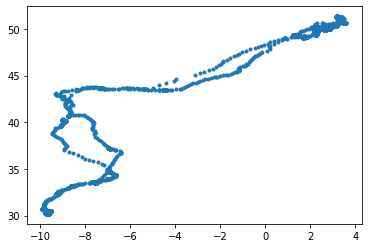

In [10]:
plt.plot(x,y,".");

In [11]:
bird_names = pd.unique(df.bird_name)

In [12]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

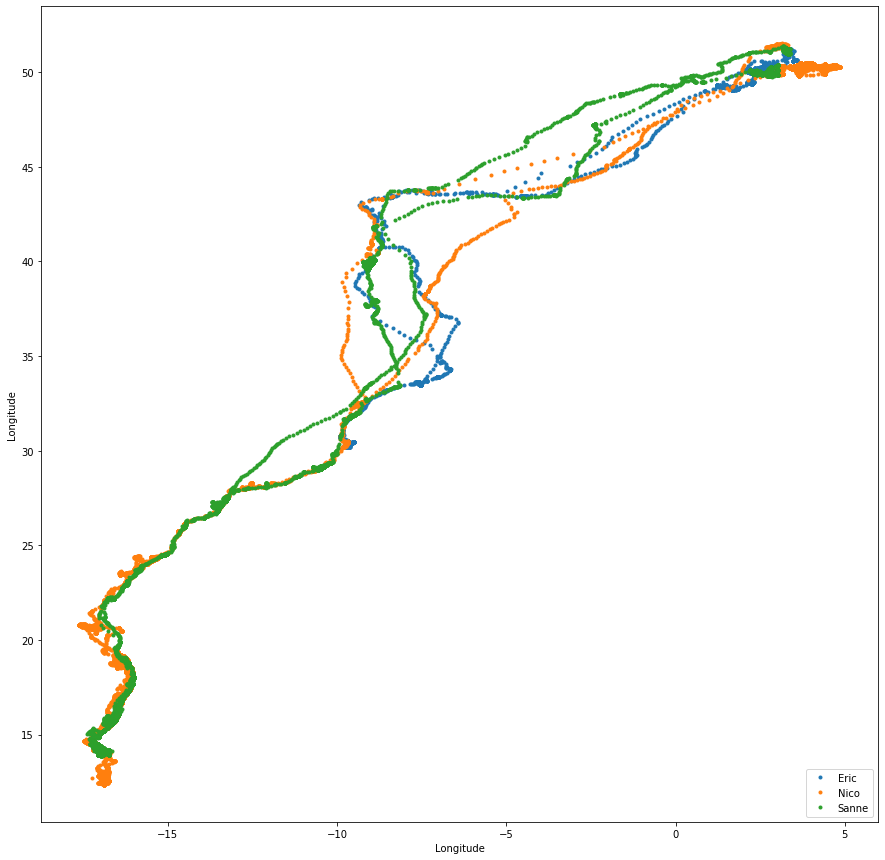

In [13]:
plt.figure(figsize=(15,15));
for name in bird_names:
    bird = df.bird_name == name
    x,y = df.longitude[bird], df.latitude[bird]
    plt.plot(x, y, ".", label=name);
plt.xlabel("Longitude")
plt.ylabel("Longitude")
plt.legend(loc="lower right")

In [14]:
eric = df.bird_name == "Eric"
speed = df.speed_2d[eric]
ind = np.isnan(speed)

In [15]:
~ind

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
19765     True
19766     True
19767     True
19768     True
19769     True
19770     True
19771    False
19772     True
19773     True
19774     True
19775     True
19776     True
19777     True
19778    False
19779     True
19780     True
19781     True
19782     True
19783     True
19784     True
19785     True
19786     True
19787     True
19788     True
19789     True
19790     True
19791     True
19792     True
19793     True
19794     True
Name: speed_2d, Length: 19795, dtype: bool

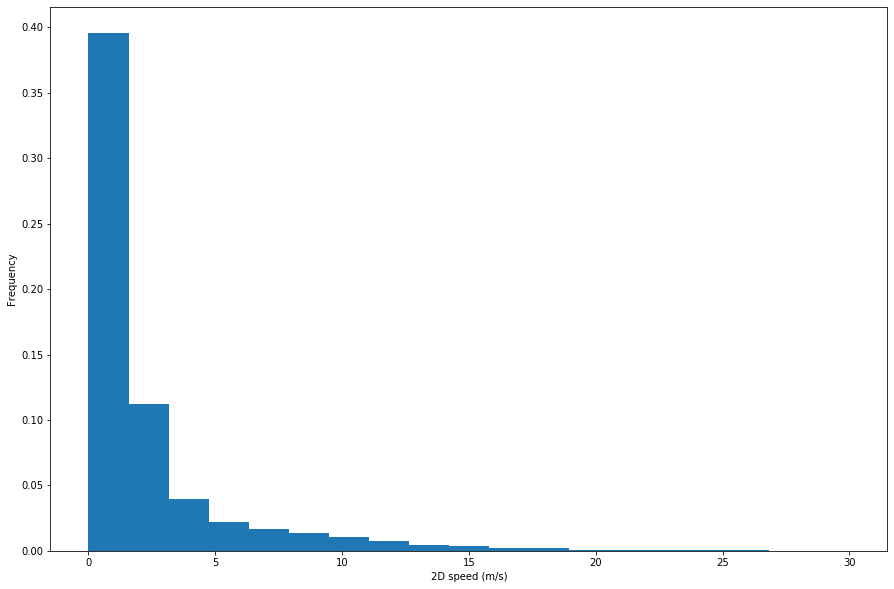

In [16]:
plt.figure(figsize=(15,10))
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), density=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

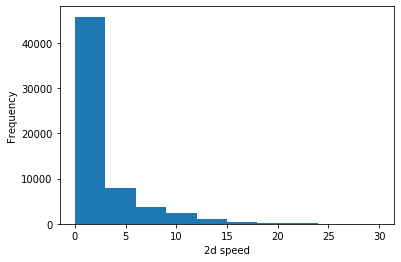

In [17]:
df.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel("2d speed")
plt.show()

In [18]:
dt.datetime.today().strftime("%a, %B %d, %Y %I:%M:%S %p")

'Thu, December 26, 2019 09:48:48 PM'

In [19]:
date_str = df.date_time[0]

In [20]:
dt.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [21]:
timestamps = []
for i in range(len(df)):
    timestamps.append(dt.datetime.strptime(df.date_time.iloc[i][:-3], "%Y-%m-%d %H:%M:%S"))

In [22]:
df['timestamp'] = pd.Series(timestamps, index = df.index)
df.head()


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [23]:
data = df[df.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / dt.timedelta(days=1)
elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

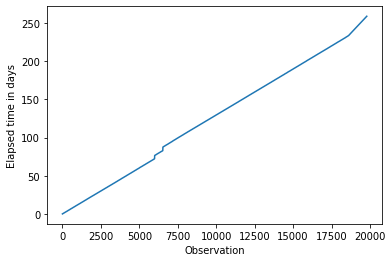

In [24]:
plt.plot(np.array(elapsed_time) / dt.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time in days");
plt.show();

In [25]:
inds = []
next_day = 1
daily_mean_speed = []

for (i, t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
        


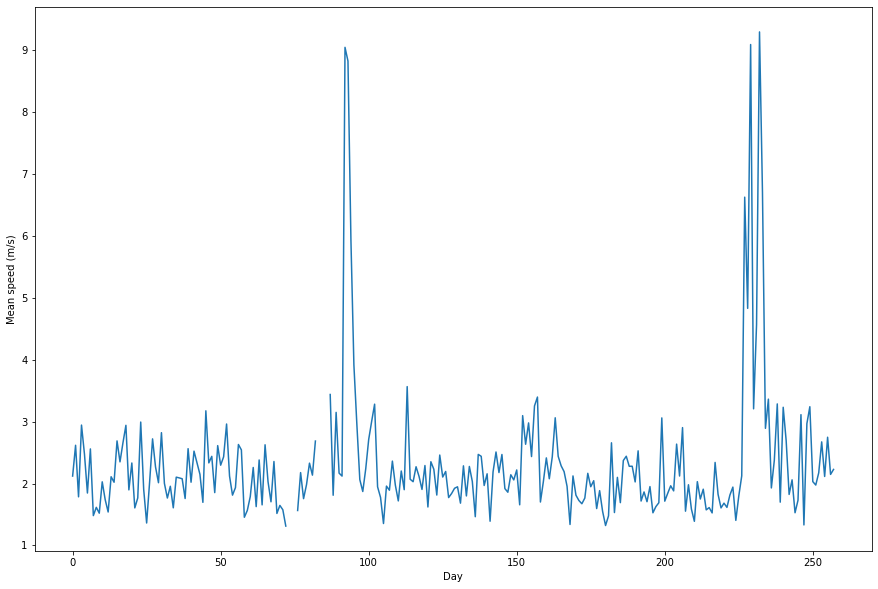

In [26]:
plt.figure(figsize=(15,10))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");
plt.show()

In [27]:
sanne = df.bird_name == "Sanne"
df[sanne].head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08
40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,2013-08-15 00:31:00
40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne,2013-08-15 01:01:19
40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne,2013-08-15 01:31:38
40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne,2013-08-15 02:01:24


In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

C:\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


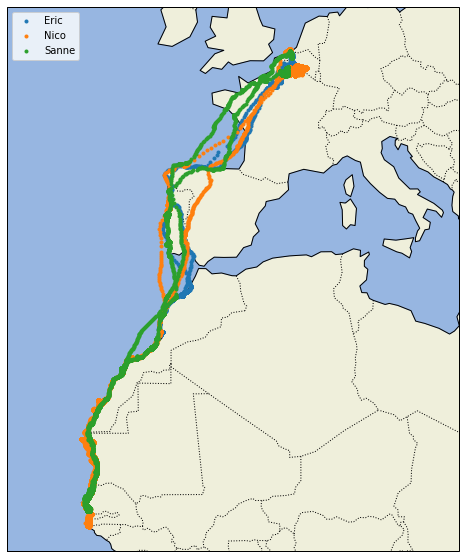

In [35]:
proj = ccrs.Mercator()
plt.figure(figsize=(15,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


for name in bird_names:
    bird = df['bird_name'] == name
    x, y = df.longitude[bird], df.latitude[bird]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)
    
plt.legend(loc="upper left")
plt.show()